# Electricity Consumption Based On Weather Data

This data is sourced from kaggle.com. In this notebook I will do a cleaning data and an EDA before visualisation.

Each row represents one day. Column description:
- date - Date of observation
- AWND - Average Daily Wind Speed (m/s)
- PRCP - Daily Precipitation (mm)
- TMAX - Daily Maximum temperature (in Celsius degrees)
- TMIN - Daily Minimum temperature (in Celsius degrees)

In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [247]:
df = pd.read_csv('electricity_consumption_based_weather_dataset.csv')

In [248]:
df.head()

,date,AWND,PRCP,TMAX,TMIN,daily_consumption
0,2006-12-16,2.5,0.0,10.6,5.0,1209.176
1,2006-12-17,2.6,0.0,13.3,5.6,3390.460
2,2006-12-18,2.4,0.0,15.0,6.7,2203.826
3,2006-12-19,2.4,0.0,7.2,2.2,1666.194
4,2006-12-20,2.4,0.0,7.2,1.1,2225.748


In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               1433 non-null   object 
 1   AWND               1418 non-null   float64
 2   PRCP               1433 non-null   float64
 3   TMAX               1433 non-null   float64
 4   TMIN               1433 non-null   float64
 5   daily_consumption  1433 non-null   float64
dtypes: float64(5), object(1)
memory usage: 67.3+ KB


In [250]:
df.describe(include='all')

,date,AWND,PRCP,TMAX,TMIN,daily_consumption
count,1433,1418.000000,1433.000000,1433.000000,1433.000000,1433.000000
unique,1433,NaN,NaN,NaN,NaN,NaN
top,2006-12-16,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.642313,3.800488,17.187509,9.141242,1561.078061
std,NaN,1.140021,10.973436,10.136415,9.028417,606.819667
min,NaN,0.000000,0.000000,-8.900000,-14.400000,14.218000
25%,NaN,1.800000,0.000000,8.900000,2.200000,1165.700000
50%,NaN,2.400000,0.000000,17.800000,9.400000,1542.650000
75%,NaN,3.300000,1.300000,26.100000,17.200000,1893.608000


## Data cleaning

In [251]:
df['date'] = pd.to_datetime(df['date'])

In [252]:
df.isna().sum()

date                  0
AWND                 15
PRCP                  0
TMAX                  0
TMIN                  0
daily_consumption     0
dtype: int64

We've got 4 period where AWND is NaN. Let's what happend before and after this periods

In [253]:
mask = df['AWND'].isna() 
expanded_mask = mask | mask.shift(-1) | mask.shift(1) | mask.shift(-2) | mask.shift(2)

df[expanded_mask]

,date,AWND,PRCP,TMAX,TMIN,daily_consumption
886,2009-05-21,3.0,0.0,30.0,15.6,1575.150
887,2009-05-22,2.8,0.0,28.9,16.7,1074.806
888,2009-05-23,NaN,0.0,22.8,15.6,1530.598
889,2009-05-24,NaN,0.0,28.3,15.6,1287.786
890,2009-05-25,NaN,0.0,27.2,17.2,1354.096
891,2009-05-26,NaN,0.0,18.9,11.7,1337.674
892,2009-05-27,1.0,0.0,18.3,11.7,1544.292
893,2009-05-28,0.1,1.5,16.1,13.3,1179.736
894,2009-05-29,0.7,10.9,23.3,12.8,1242.846
895,2009-05-30,NaN,0.0,25.0,15.6,1659.106


We will replace these NaNs by interpolating linearly between the nearest non-NaN values.

In [254]:
df['AWND'] = df['AWND'].interpolate('linear')

In [255]:
df.isna().sum()

date                 0
AWND                 0
PRCP                 0
TMAX                 0
TMIN                 0
daily_consumption    0
dtype: int64

Finally, we will make sure the data is sorted by date

In [256]:
df = df.sort_values(by='date')

## EDA

In [257]:
df.describe(include='all')

,date,AWND,PRCP,TMAX,TMIN,daily_consumption
count,1433,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000
mean,2008-12-02 20:05:51.709699840,2.635241,3.800488,17.187509,9.141242,1561.078061
min,2006-12-16 00:00:00,0.000000,0.000000,-8.900000,-14.400000,14.218000
25%,2007-12-10 00:00:00,1.800000,0.000000,8.900000,2.200000,1165.700000
50%,2008-12-02 00:00:00,2.400000,0.000000,17.800000,9.400000,1542.650000
75%,2009-11-26 00:00:00,3.200000,1.300000,26.100000,17.200000,1893.608000
max,2010-11-26 00:00:00,10.200000,192.300000,39.400000,27.200000,4773.386000
std,NaN,1.136825,10.973436,10.136415,9.028417,606.819667


Let's figure out if there are more than 1 day diff between observations

In [258]:
df['date'].diff().unique()

<TimedeltaArray>
[NaT, '1 days', '2 days', '5 days', '3 days']
Length: 5, dtype: timedelta64[ns]

In [259]:
df['date'].diff().value_counts()

date
1 days    1427
2 days       3
5 days       1
3 days       1
Name: count, dtype: int64

There are just few gaps in data, we'll ignore this.

Now, we will check how daily consumption cost changes over a one-week period

In [260]:
df_ts = df.copy()
df_ts.index = df_ts['date']
df_ts = df_ts.drop('date', axis=1)

<Axes: xlabel='date', ylabel='AWND'>

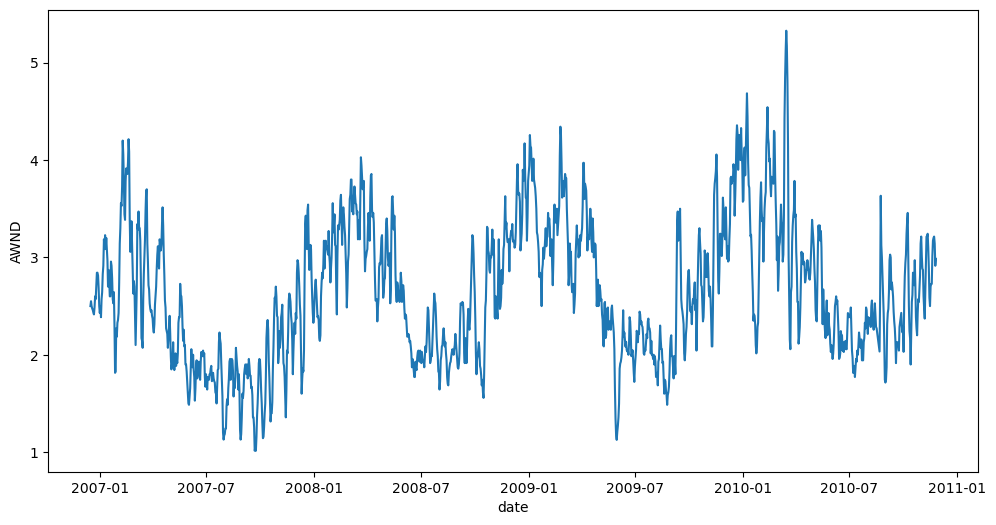

In [261]:
plt.figure(figsize=(12,6))
sns.lineplot(df_ts['AWND'].rolling(window='7D').mean())

We can clearly see seasonality, where the consumption cost drops as expected. There are some anomalies, which we will examine in more detail later.

Now let's do the same with others features

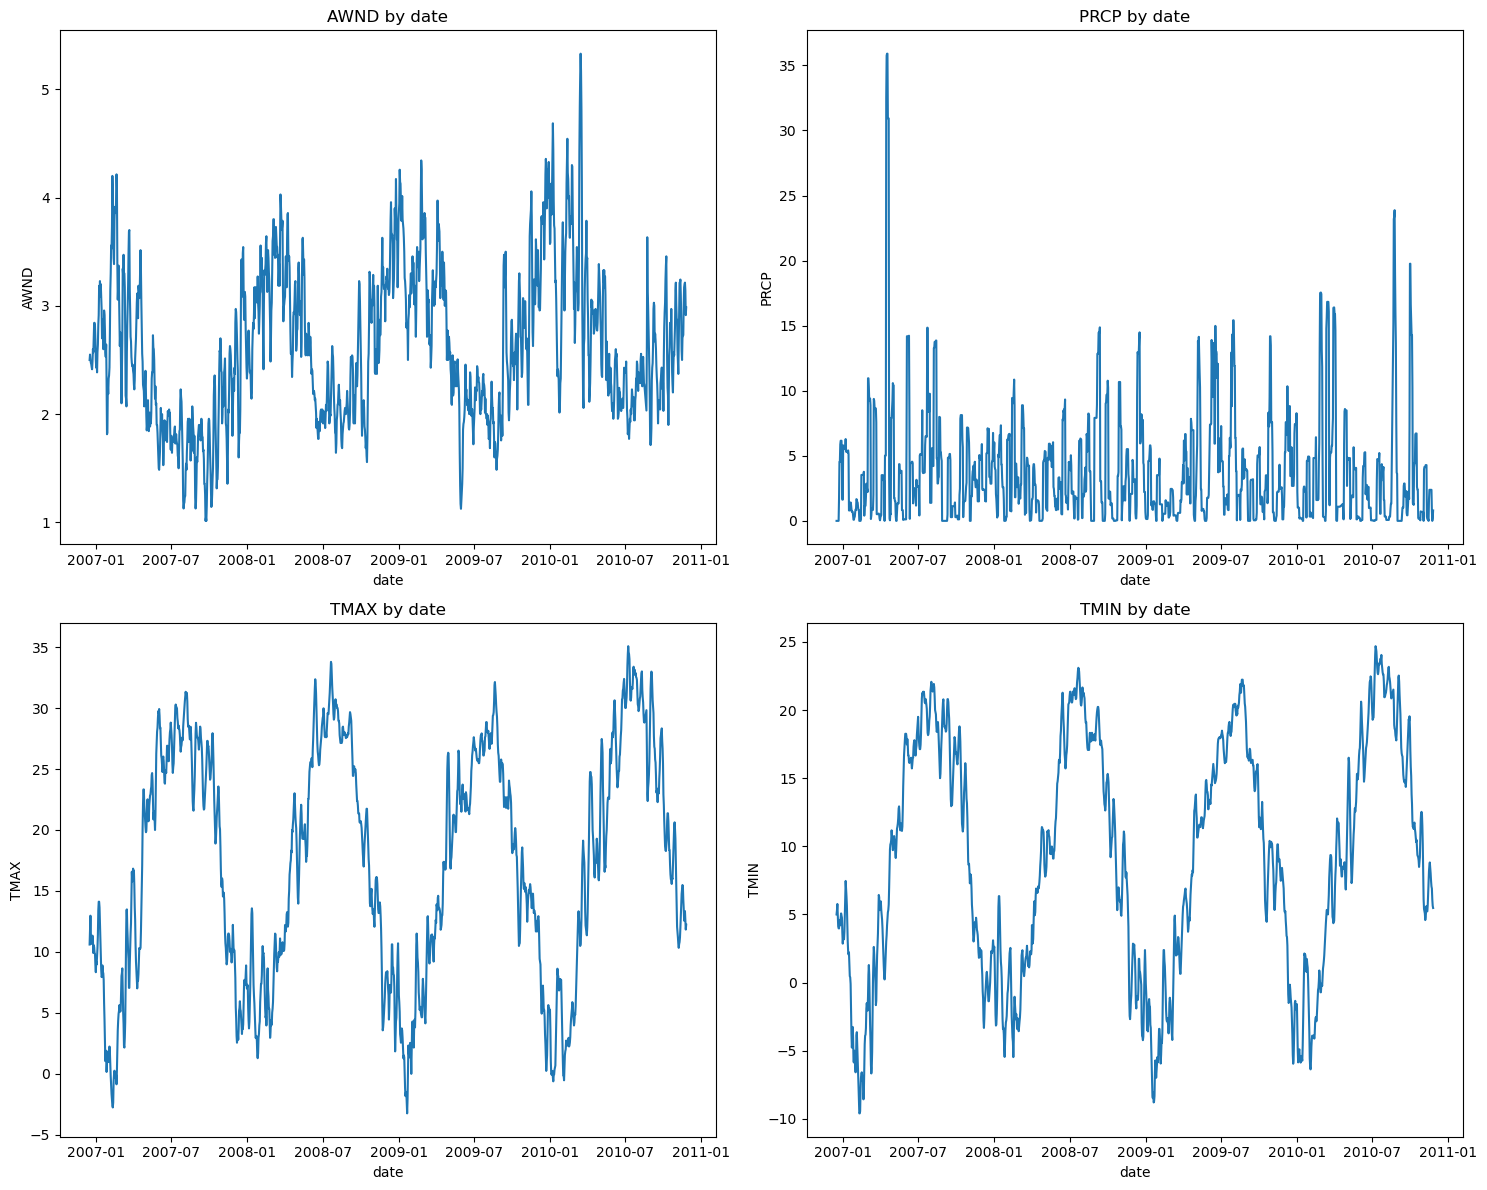

In [262]:
fig, axes = plt.subplots(2, 2, figsize=(15,12))

for ax, column in zip(axes.flatten(), df_ts.columns):
    sns.lineplot(
        df_ts[column].rolling(window='7D').mean(),
        ax=ax
    )
    
    ax.set_title(f'{column} by date')

plt.tight_layout()

<Axes: >

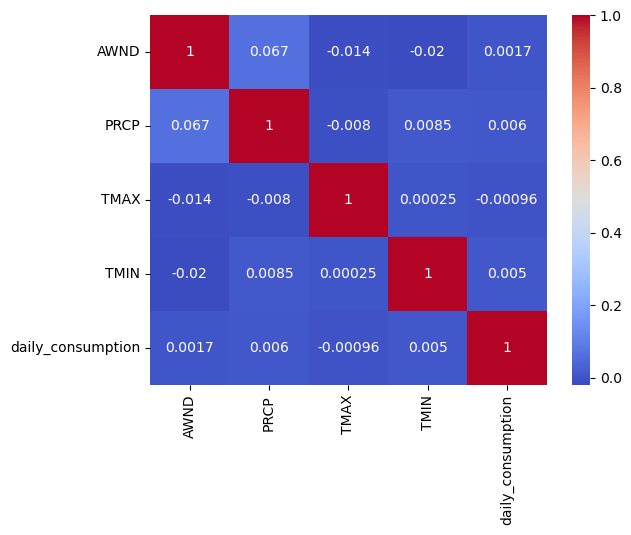

In [266]:
sns.heatmap(df_ts.pct_change().corr(), annot=True, cmap='coolwarm')